In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

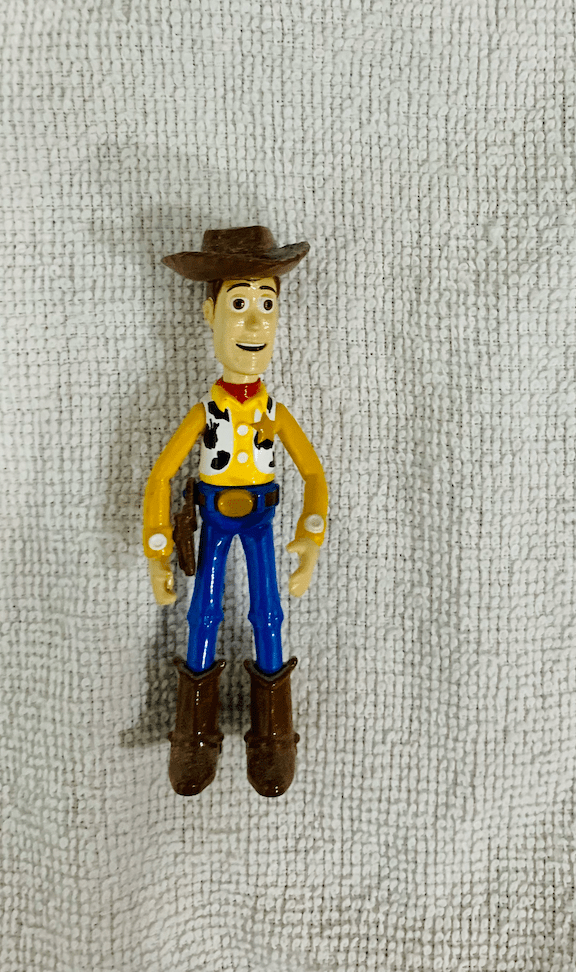

In [55]:
image1 = cv.imread('/content/drive/My Drive/Dataset/Images/5-min.png')

image_orig = image1.copy()

cv2_imshow(image1)

In [40]:
# blur = cv.bilateralFilter(image1, 11, 75, 75)

# cv2_imshow(blur)

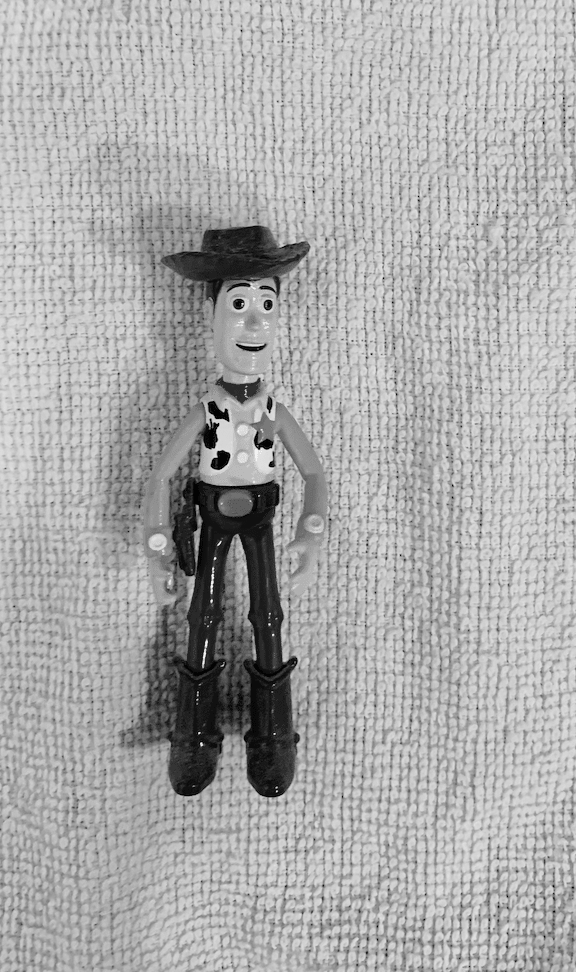

In [57]:
image = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
cv2_imshow(image)

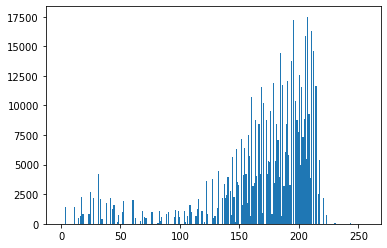

In [58]:
plt.hist(image.flatten(), 256, [0,256])
plt.show()

In [59]:
# equalized = cv.equalizeHist(image)
# cv2_imshow(equalized)

In [60]:
# blur = cv.bilateralFilter(equalized, 11, 75, 75)

# cv2_imshow(blur)

140.0


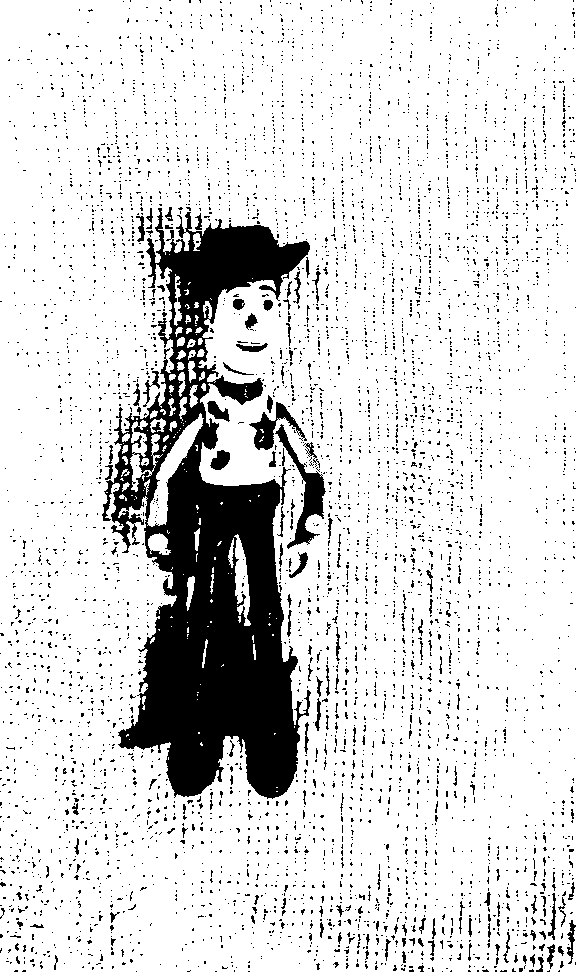

In [63]:
thresholding_value, thresholding_result = cv.threshold(image, 140, 255, cv.THRESH_BINARY)
print(thresholding_value)
cv2_imshow(thresholding_result)

In [64]:
thresholding_result = cv.bitwise_not(thresholding_result)

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(contours)

[array([[[442, 971]]], dtype=int32), array([[[248, 971]],

       [[249, 971]]], dtype=int32), array([[[215, 971]],

       [[216, 971]]], dtype=int32), array([[[136, 971]]], dtype=int32), array([[[559, 970]],

       [[558, 971]],

       [[559, 971]]], dtype=int32), array([[[549, 970]],

       [[548, 971]],

       [[547, 971]],

       [[549, 971]]], dtype=int32), array([[[501, 970]],

       [[500, 971]],

       [[506, 971]],

       [[506, 970]],

       [[504, 970]],

       [[503, 971]],

       [[502, 971]]], dtype=int32), array([[[495, 970]],

       [[495, 971]],

       [[496, 971]],

       [[496, 970]]], dtype=int32), array([[[477, 970]],

       [[477, 971]],

       [[478, 971]],

       [[478, 970]]], dtype=int32), array([[[468, 970]],

       [[468, 971]],

       [[470, 971]],

       [[469, 970]]], dtype=int32), array([[[451, 970]],

       [[450, 971]],

       [[451, 971]]], dtype=int32), array([[[234, 970]],

       [[234, 971]]], dtype=int32), array([[[190, 970

In [65]:
len(contours)

5240

In [66]:
contours[0]

array([[[442, 971]]], dtype=int32)

In [67]:
#FeatureExtraxtion Contours
area = cv.contourArea(contours[0])

area

0.0

In [68]:
x, y, w, h = cv.boundingRect(contours[0])

print(x, y, w, h)

442 971 1 1


In [69]:
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)

  print("Contour #" + str(index), x, y, w, h, area)


Streaming output truncated to the last 5000 lines.
Contour #241 80 931 1 1 0.0
Contour #242 7 931 2 2 0.5
Contour #243 530 930 6 11 22.0
Contour #244 523 930 3 1 0.0
Contour #245 517 930 2 1 0.0
Contour #246 272 930 2 3 1.0
Contour #247 139 930 2 1 0.0
Contour #248 512 929 2 2 1.0
Contour #249 508 929 1 2 0.0
Contour #250 358 929 1 1 0.0
Contour #251 498 928 1 3 0.0
Contour #252 493 928 2 2 1.0
Contour #253 451 928 2 7 4.5
Contour #254 330 928 2 2 0.5
Contour #255 242 928 2 2 1.0
Contour #256 192 928 2 3 1.5
Contour #257 19 928 2 2 0.5
Contour #258 442 927 3 8 5.5
Contour #259 252 927 1 1 0.0
Contour #260 90 927 3 5 3.0
Contour #261 411 926 1 1 0.0
Contour #262 384 926 4 6 6.5
Contour #263 210 926 2 1 0.0
Contour #264 526 925 1 2 0.0
Contour #265 518 925 1 2 0.0
Contour #266 412 925 4 7 6.5
Contour #267 333 925 2 2 0.5
Contour #268 242 925 2 2 0.5
Contour #269 219 925 2 2 1.0
Contour #270 110 925 4 6 9.5
Contour #271 402 924 5 12 13.0
Contour #272 394 924 4 10 10.0
Contour #273 367 924

Object


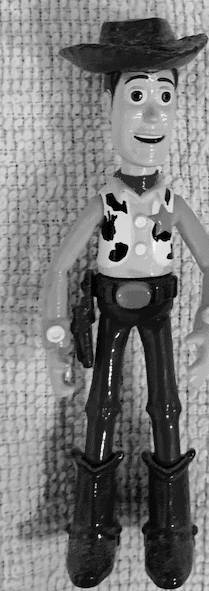

In [80]:
x, y, w, h = cv.boundingRect(contours[3988])
woody = image[y:y+h, x:x+w]
print('Object')
cv2_imshow(woody)

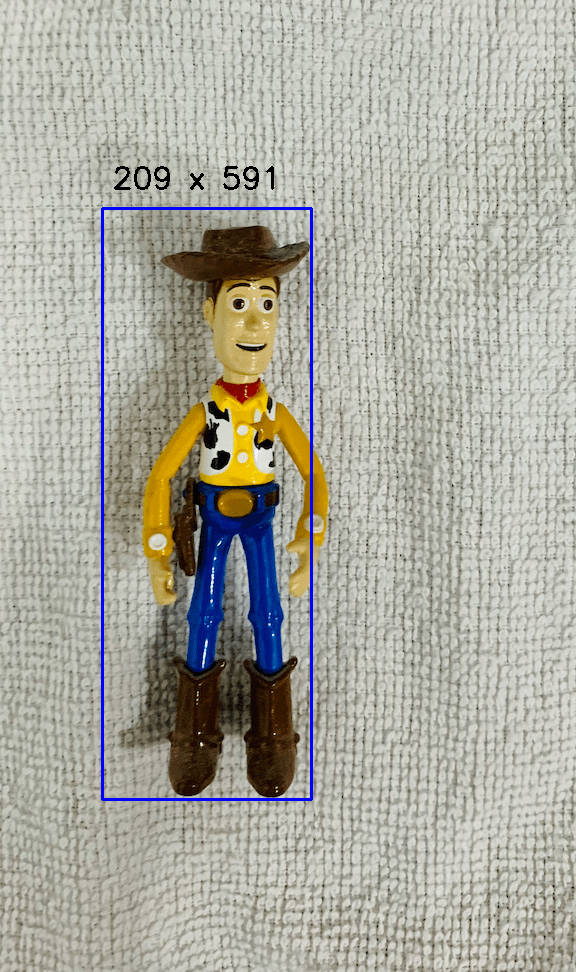

In [79]:
image_orig = image1.copy()
cv.rectangle(image_orig, (x,y), (x+w,y+h), (255,0,0), 2)
font = cv.FONT_HERSHEY_SIMPLEX
bottomRightCornerOfText = (x+10,y-20)
fontScale = 1
fontColor = (0,0,0)
lineType = 2
text = str(w) + ' x ' + str(h)
cv.putText(image_orig, text, bottomRightCornerOfText, font, fontScale, fontColor, lineType)
cv2_imshow(image_orig)


Proses preprosesing sebelum ekstraksi contour : Gambar diubah menjadi abu-abu menggunakan grayscale. Agar mempertajam gambar digunakan fungsi equalized. Kemudian dilakukan global thresholding dengan threshold 160. Dikarenakan background berwarna putih, maka diperlukan fungsi bitwise karena program membaca background hanya berwarna hitam. Dari hasil thresholding didapatkan contournya.

